# 정규성 검정

In [1]:
import scipy

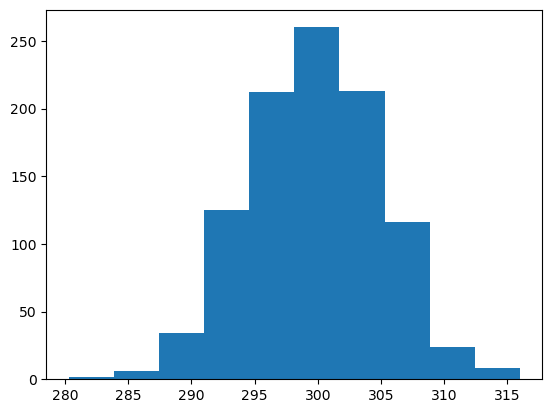

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [3]:
#다음 데이터의 정규성을 검증하라.
from scipy.stats import shapiro
print(shapiro(df))
#사피로 검정시 pvalue가 0.34이기 때문에 귀무가설을 기각할 수 없다.(귀무가설 채택)

ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


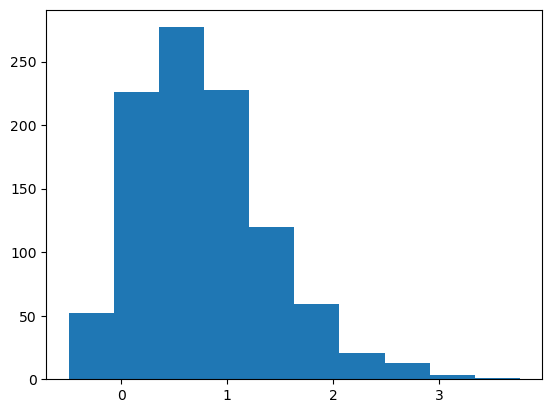

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [10]:
df.describe()

,data
count,1000.000000
mean,0.773688
std,0.626498
min,-0.496451
25%,0.319801
50%,0.696165
75%,1.111193
max,3.761382


In [11]:
#다음 데이터의 정규성을 검증하라.
from scipy.stats import shapiro
print(shapiro(df))
#사피로 검정시 p-value가 2.30e-16이기 때문에 유의수준인 5%에서 귀무가설 기각(대립가설 채택)

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


In [12]:
#위의 데이터를 log변환 한 후에 정규성을 가지는지 확인하라
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')

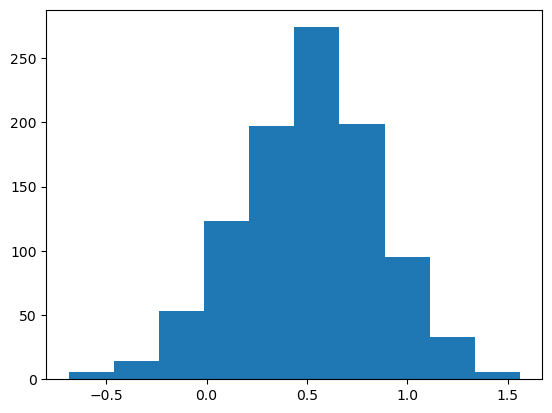

In [14]:
log_y_data = np.log1p(df)

plt.hist(log_y_data)
plt.show()

In [16]:
from scipy.stats import shapiro

print(shapiro(log_y_data))

#샤피로 검정시 p-value가 0.17이기 때문에 유의수준 5%에서 귀무가설 채택(데이터는 정규성을 가진다)

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)


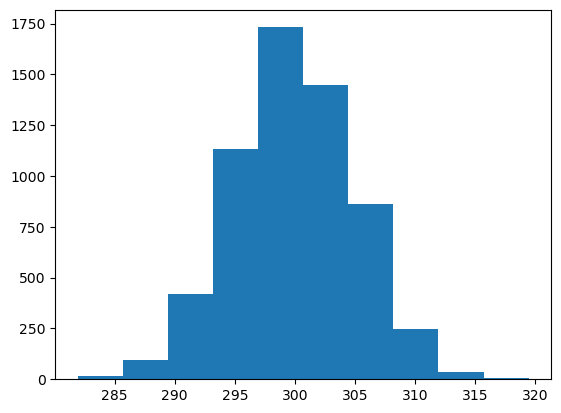

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [19]:
#다음의 정규성을 검증하라.
#귀무가설: 정규성을 가진다
#대립가설: 정규성을 가지지 않는다.
from scipy.stats import shapiro
print(shapiro(df))

#샤피로 검정시 p-value가 0.15이기 때문에 유의수준 5%에서 귀무가설 채택(데이터는 정규성을 가진다)

ShapiroResult(statistic=0.9995355606079102, pvalue=0.1507067084312439)


c:\Users\rkh03\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# 단일 표본 t 검정

In [20]:
#100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
#그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [21]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a830c13210>,
 'caps': [<matplotlib.lines.Line2D at 0x1a830c129d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a830ba5d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a830c46d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a830c46090>],
 'means': []}

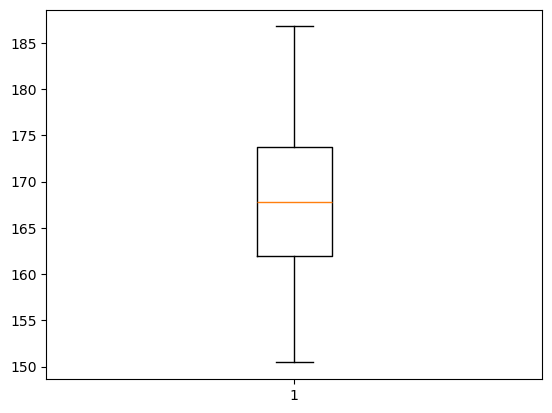

In [22]:
plt.boxplot(df)

(array([ 6.,  7., 11., 15., 16., 12., 18.,  8.,  6.,  1.]),
 array([150.44114707, 154.07327979, 157.70541251, 161.33754524,
        164.96967796, 168.60181068, 172.23394341, 175.86607613,
        179.49820885, 183.13034158, 186.7624743 ]),
 <BarContainer object of 10 artists>)

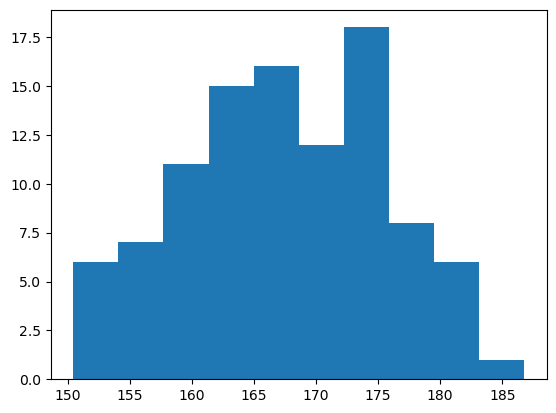

In [23]:
plt.hist(df)

In [27]:
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value : ', pvalue,'이므로')

if pvalue < 0.05:
    print('귀무가설을 기각한다. 정규성을 만족하지 않으므로 비모수 검정을 진행한다. 윌콕슨 순위 부호 검정을 진행한다.\n')
    print('윌콕슨 순위 부호 검정의 귀무가설은 "100명의 키의 평균은 165이다."이며 대립가설은 "100명의 키의 평균은 165가 아니다"이다')
    
    #윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165) 
    
    
    if pvalue <0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 대립가설을 기각하고 귀무가설을 채택한다')
        
else:
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.\n')
    print('단일표본  t-test의 귀무가설은 "100명 키의 평균은 165이다"이며 대립가설은 "100명의 키의 평균은 165가 아니다"이다')
    
    #단일 표본 t검정
    static, pvalue = ttest_1samp(df['height'], 165)
    
    if pvalue <0.05:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else:
        print(f'검정 결과 pvalue는 {pvalue}로 결과는 대립가설을 기각하고 귀무가설을 채택한다.')

샤피로 정규성 검정 p-value :  0.4558176100254059 이므로
귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다.

단일표본  t-test의 귀무가설은 "100명 키의 평균은 165이다"이며 대립가설은 "100명의 키의 평균은 165가 아니다"이다
검정 결과 pvalue는 0.0018367171548080209로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


In [28]:
#100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
#그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.


In [33]:
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

#1. 데이터 정규성 만족하는지 확인.
static, pvalue = shapiro(df)
print(shapiro(df))
#귀무가설: 정규성을 만족한다
#대립가설: 정규성을 만족하지 않는다.
#pvalue가 0.455이기 때문에 귀무가설 기각 x, 정규성을 만족하므로 단일표본 검정으로 확인.

#2. 평균키 165 판단.
#귀무가설: 평균키는 165이다
#대립가설: 평균키는 165가 아니다.
static, pvalue = ttest_1samp(df['height'], 165)

print(ttest_1samp(df['height'],165))


#pvalue=0.0018367171548080209는 유의수준 5%에서 0.001이기 때문에 귀무가설 기각, 대립가설 채택
#평균키는 165가 아니다.

ShapiroResult(statistic=0.9872668981552124, pvalue=0.4558176100254059)
TtestResult(statistic=3.2017884987150644, pvalue=0.0018367171548080209, df=99)


In [34]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

In [36]:
#100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
#그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [40]:
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon
#1. 데이터가 정규성을 만족하는지 확인하라.
#귀무가설: 데이터가 정규성을 만족한다.(만족한다면 ttest_1samp 단일 표본 사용)
#대립가설: 데이터가 정규성을 만족하지 않는다.(만족하지 않는다면 비모수 검정 wilcoxon  윌콕슨 검정부호 사용)

static, pvalue = shapiro(df)
print(shapiro(df))

#p-value가 0.013이기 때문에 귀무가설 기각(정규성 만족 x ): 대립가설 채택

#귀무가설: 평균키는 165이다.
#대립가설: 평균키는 165가 아니다.

static, pvalue = wilcoxon(df['height']-165)

print(wilcoxon(df['height']-165))

#p-value가 0.048이기 때문에 대립 가설 채택
# 평균키는 165가 아니다.

ShapiroResult(statistic=0.9672006368637085, pvalue=0.013552471995353699)
WilcoxonResult(statistic=1952.0, pvalue=0.04880534424649582)


# 등분산 검정

In [1]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [5]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

#두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(bartlett(a,b))

print(fligner(a,b,center = 'median'))
print(fligner(a,b,center = 'mean'))

print(levene(a,b,center = 'median'))
print(levene(a,b,center = 'mean'))

#p-value 값이 다 0.05를 넘기 때문에 대립가설 기각, 귀무가설 채택(등분산이다.)

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


In [7]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy3.csv')
df.head()

,class,score
0,A,32
1,A,69
2,A,68
3,A,60
4,A,78


In [8]:
#두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

print(bartlett(a,b))

print(fligner(a,b,center='median'))
print(fligner(a,b,center='mean'))

print(levene(a,b,center='median'))
print(levene(a,b,center='mean'))

#Bartlet의 경우에는 p-value가 0.21이므로 귀무가설 채택
#Fligner, Levene의 경우에는 p-value가 0.05를 넘지 않기 때문에 대립가설 채택.


BartlettResult(statistic=1.5116783794562305, pvalue=0.2188831590902503)
FlignerResult(statistic=4.960366756026232, pvalue=0.025934706256615564)
FlignerResult(statistic=4.94724457924667, pvalue=0.026132286002684912)
LeveneResult(statistic=4.307122424591436, pvalue=0.03848734007752694)
LeveneResult(statistic=4.342327020297874, pvalue=0.0377066528874248)


In [11]:
import scipy

In [17]:
print(help(bartlett))

Help on function bartlett in module scipy.stats._morestats:

bartlett(*samples)
    Perform Bartlett's test for equal variances.
    
    Bartlett's test tests the null hypothesis that all input samples
    are from populations with equal variances.  For samples
    from significantly non-normal populations, Levene's test
    `levene` is more robust.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        arrays of sample data.  Only 1d arrays are accepted, they may have
        different lengths.
    
    Returns
    -------
    statistic : float
        The test statistic.
    pvalue : float
        The p-value of the test.
    
    See Also
    --------
    fligner : A non-parametric test for the equality of k variances
    levene : A robust parametric test for equality of k variances
    
    Notes
    -----
    Conover et al. (1981) examine many of the existing parametric and
    nonparametric tests by extensive simulations and they conclude that the
    

In [18]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()

,A,B
0,44,36
1,61,92
2,76,41
3,64,45
4,65,35


In [21]:
#2개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import fligner

print(bartlett(df.A, df.B))
print(fligner(df.A, df.B))

print(levene(df.A, df.B))

# bareltt = 등분산이다, Fligner, Levene = 등분산이 아니다.

BartlettResult(statistic=2.383217881104806, pvalue=0.12264468401742169)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)


In [22]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

,A,B
0,74,30.0
1,30,59.0
2,35,69.0
3,45,88.0
4,74,68.0


In [26]:
#두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라
df.isnull().sum()

A      0
B    120
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       300 non-null    int64  
 1   B       180 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [28]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

print(bartlett(df.A, df.B.dropna()))
print(fligner(df.A, df.B.dropna()))
print(levene(df.A, df.B.dropna()))

#Bartlett = 등분산이다, fligner, levene = 등분산이 아니다.

BartlettResult(statistic=3.024072692680794, pvalue=0.08203720607748438)
FlignerResult(statistic=7.710320541528441, pvalue=0.005490600130793619)
LeveneResult(statistic=8.008595918808284, pvalue=0.004851565077063284)


# 독립표본 검정

In [29]:
#독립 표본 t검정의 경우 집단의 정규성에 따라 접근방식이 다르다
#정규성 검정은 shapiro , anderson(샘플 5000개 이상) 을 통해 확인

In [30]:
#두개 학급의 시험성적에 대한 데이터이다. 
# 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

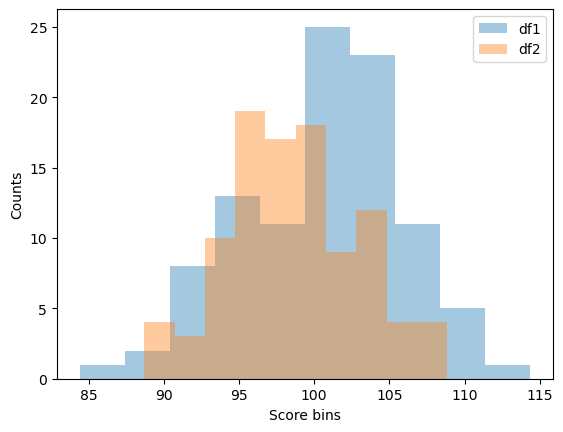

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [40]:
#두개 학급의 시험성적에 대한 데이터이다. 
# 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라
from scipy.stats import shapiro

#정규성 검증.
print(shapiro(df1))
print(shapiro(df2))

#두 그룹 모두 shapiro 검정 결과 귀무가설(정규성을 가진다.)을 기각하지 못한다. 두 그룹 모두 정규성을 가진다.

#2. 등분산 확인.
from scipy.stats import levene
print()
print(levene(df1['data'],df2['data']))
# 두 그룹은 levene 검정을 확인해 본 결과 pvalue는 0.11로 귀무가설을 채택. 그러므로 등분산은 가진다.

#등분산이기 때문에 eqaul_var는 True 파라미터를 주고 ttest_ind 모듈을 이용하여 t test를 진행
from scipy.stats import ttest_ind
print()
print(ttest_ind(df1,df2,equal_var=True))

## pvalue는 0.006이므로 귀무가설(각 그룹의 평균값은 동일하다)기각, 대립가설(각 그룹의 평균값은 동일하지 않다)채택.

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)

LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)

TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))
TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))


In [36]:
from scipy.stats import ttest_ind

In [38]:
help(ttest_ind)

Help on function ttest_ind in module scipy.stats._stats_py:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
  

In [ ]:
#두개 학급의 시험성적에 대한 데이터이다. 
#두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

In [42]:
#두개 학급의 시험성적에 대한 데이터이다. 
#두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

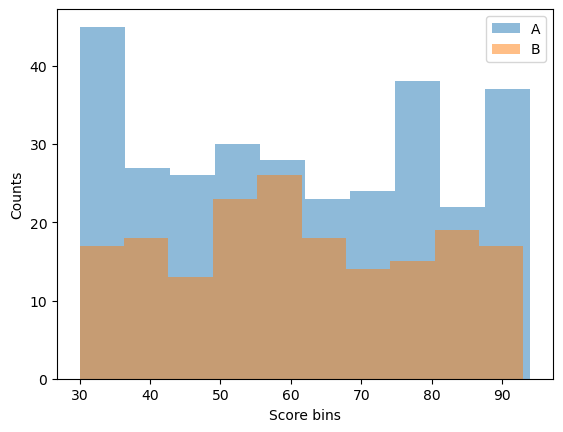

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [44]:
#b의 경우 고른 분포, a같은 경우 분포가 고르지 않음.

In [45]:
#분포를 보니 정규성을 위배하는 것처럼 보인다.
#두 그룹중 한 그룹만 정규성을 위배해도 독립표본 t-검정을 할 수 없다.

In [48]:
print(shapiro(df['B'].dropna()))
print(shapiro(df['A']))

# 두 그룹 모두 정규성을 위배하는 것으로 판단. (귀무가설 기각, 대립가설 채택)
# 그러므로 비모수 검정 진행.

from scipy.stats import mannwhitneyu, ranksums

print()
print(mannwhitneyu(df['A'],df['B'].dropna()))
print(ranksums(df['A'],df['B'].dropna()))

# Man-Whiteney U Test 검정 결과 pvalue는 0.49값으로 귀무가설(평균은 같다) 채택, 
# 두 그룹의 평균은 동일하다.

ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)
ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


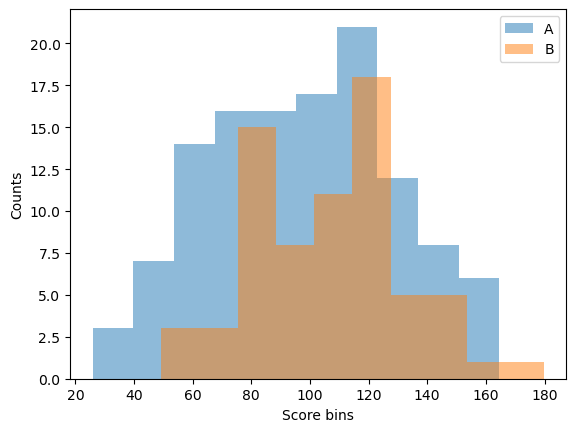

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [49]:
#두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

In [51]:
df.head()

,group,data
0,a,108.065847
1,a,88.714106
2,a,61.182748
3,a,51.763444
4,a,127.858730


In [55]:
a = df[df['group'] == 'a'].data
b = df[df['group'] == 'b'].data
#1. 정규성 검증
from scipy.stats import shapiro

print(shapiro(a))

print(shapiro(b))

#정규성 검정을 해보니 둘 다 정규성을 가지는 것으로 판단. 귀무가설 채택

 
#2.등분산 검증
from scipy.stats import levene

print()
print(levene(a,b))
#등분산 검증을 해보니 pvalue가 0.013으로 귀무가설 기각, 대립가설 채택
#그러므로 eqaul_var는 False

from scipy.stats import ttest_ind
print()
print(ttest_ind(a,b, equal_var=False))
#pvalue는 0.0295이므로 귀무가설 (각 그룹의 평균은 동일하다) 기각, 
# 대립가설(각 그룹의 평균은 동일하지 않다.) 채택

#결론적으로 두 그룹은 모두 정규성을 가지지만 등분산은 아니며, 평균은 동일하다고 보기 어렵다.


ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831852316856384, pvalue=0.4701973497867584)

LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)

TtestResult(statistic=-2.1949470315829265, pvalue=0.029512802991767898, df=171.25282465005142)


In [56]:
#두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

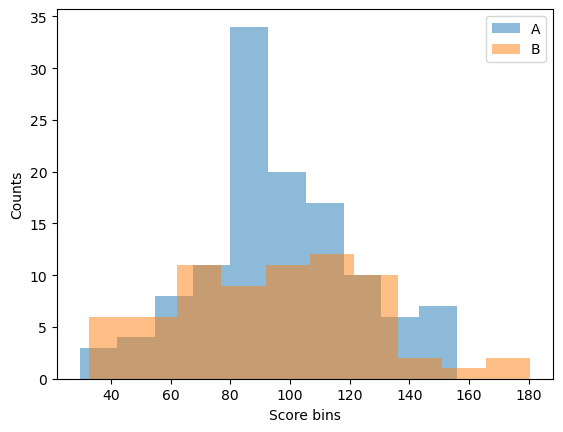

In [65]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')

plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [66]:
df.info()
# 결측값 확인. b그룹

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       120 non-null    float64
 1   b       70 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


In [59]:
df.head()

,a,b
0,121.023118,69.982090
1,69.740978,139.774624
2,93.737693,175.425924
3,100.331645,85.493555
4,75.048925,83.488953


In [67]:
df.isnull().sum()

a     0
b    50
dtype: int64

In [63]:
#두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라


#정규성 검증
from scipy.stats import shapiro

print(shapiro(df['a']))
print(shapiro(df['b'].dropna()))

#p 값이 0.28, 0.59이므로 정규성을 가진다.

from scipy.stats import levene

print(levene(df['a'],df['b'].dropna()))

# p값이 0.047이므로 등분산이 아니다. 
#그러므로 equal_var = False

from scipy.stats import ttest_ind

print(ttest_ind(df['a'],df['b'].dropna(),equal_var=False))

#pvalue가 0.998이기 때문에 두 그룹의 평균은 동일하다고 볼 수 있다.

#정규성을 가지지만, 등분산은 아니며, 평균은 동일하다고 볼 수 있다.

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854326844215393, pvalue=0.5937624573707581)
LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)
TtestResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704, df=122.72255248639058)


# 대응표본 t 검정